In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

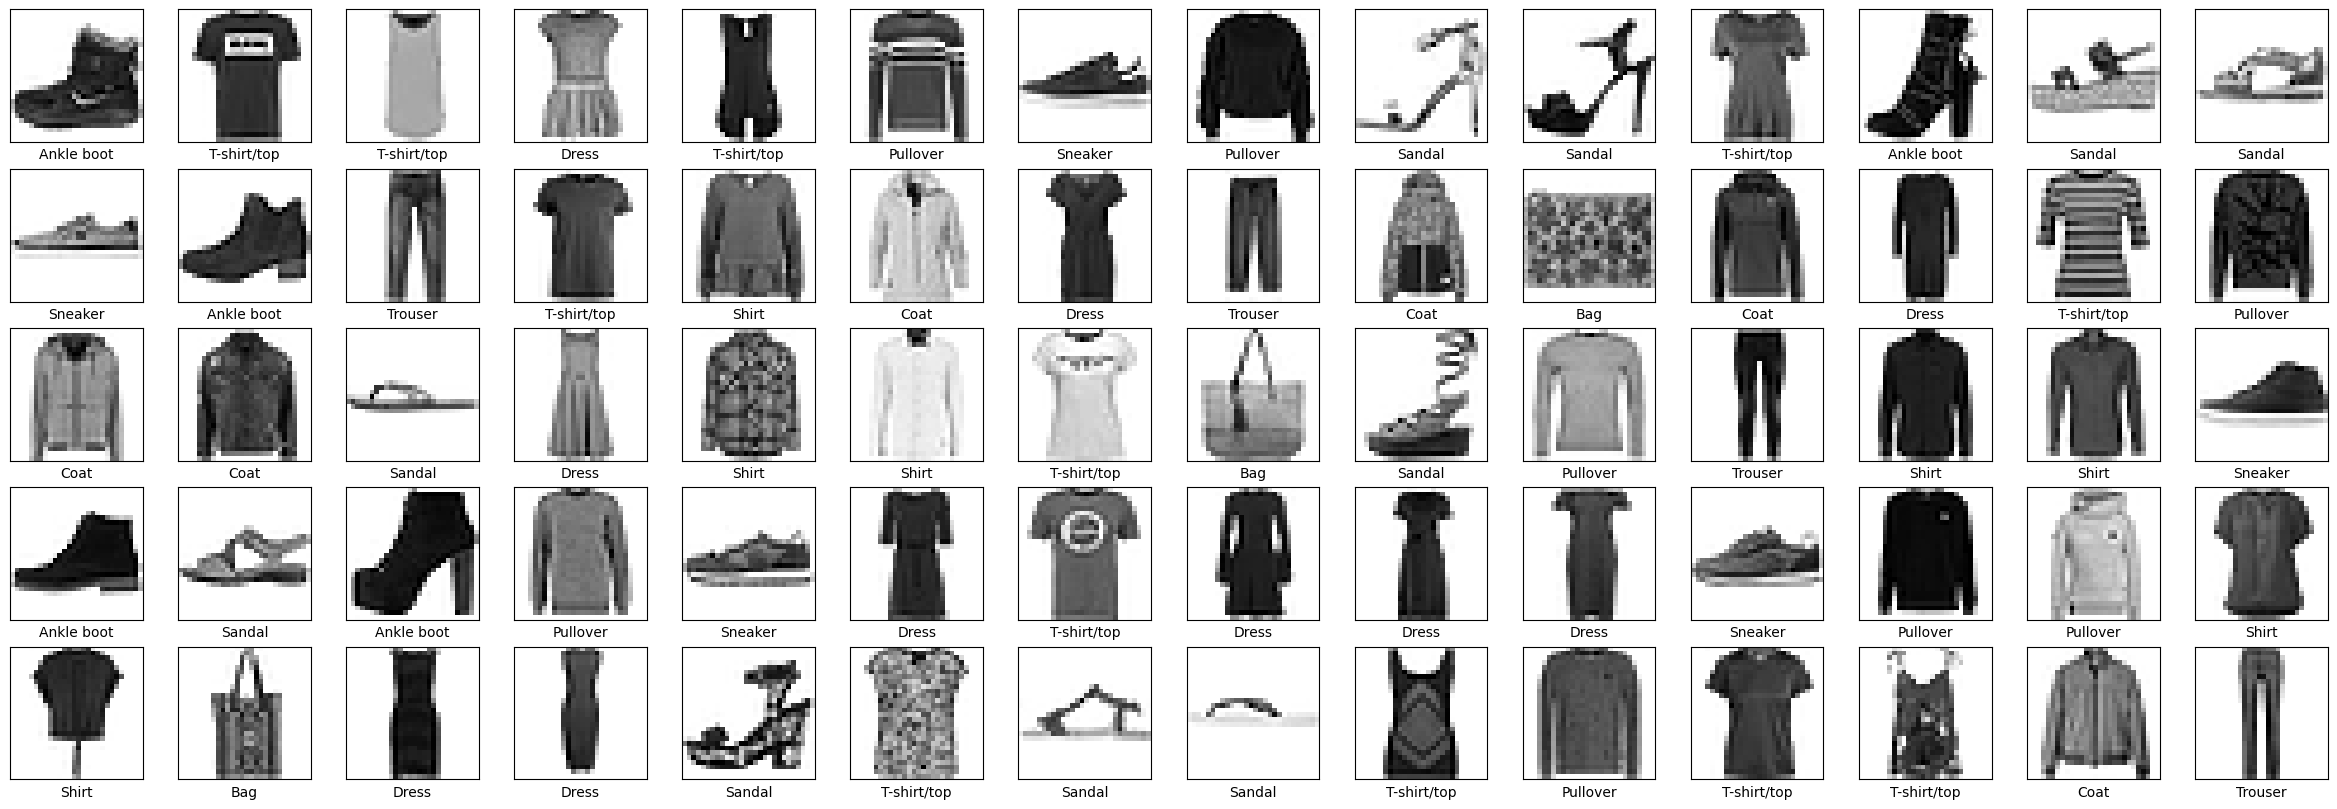

In [5]:
# plot some data
plt.figure(figsize=(30,10))

for i in range(70):
    plt.subplot(5,14,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
x_train = np.expand_dims(train_images,
                         axis=-1)
y_train = tf.keras.utils.to_categorical(train_labels,
                                        num_classes=len(class_names))
x_train.shape

(60000, 28, 28, 1)

In [7]:
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(scale=1./255),

    tf.keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(56, (3,3), activation='relu'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.4213 - accuracy: 0.8487
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2790 - accuracy: 0.8990
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2273 - accuracy: 0.9164
Epoch 4/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1912 - accuracy: 0.9284
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1625 - accuracy: 0.9409
Epoch 6/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1358 - accuracy: 0.9495
Epoch 7/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1137 - accuracy: 0.9582
Epoch 8/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0957 - accuracy: 0.9646
Epoch 9/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0801 - accuracy: 0.9703
Epoch 10/10
 548/1875 [=======>......................] - ETA: 44

KeyboardInterrupt: 

In [ ]:
x_test = np.expand_dims(train_images,
                        axis = -1)
y_test = tf.keras.utils.to_categorical(train_labels,
                                       num_classes=len(class_names))


test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

1875/1875 [==============================] - 22s 12ms/step - loss: 0.0163 - accuracy: 0.9950
Test accuracy: 0.9950000047683716
